# Testing data analysis scripts of a run

In case you only have the h5 files and not the .json

In [1]:
%matplotlib notebook
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from escape.parse import swissfel
import h5py
from jungfrau_utils import apply_gain_pede, apply_geometry
h5py.enable_ipython_completer()
import time
import sys

In [2]:
sys.path.insert(0, '../src/')
from data_analysis import *
from integrators import *

In [12]:
h5path = '/sf/bernina/data/p17743/res/waterJet_tests/scattering_WaterJet_test1.JF07T32V01.h5'
h5file = h5py.File(h5path,'r')
jf7 = h5file['data/JF07T32V01/data']
with h5py.File('/sf/bernina/config/jungfrau/gainMaps/JF07T32V01/gains.h5','r') as f:
    gains = f['gains'].value
with h5py.File('/sf/bernina/data/p17743/res/waterJet_tests/JFpedestal/pedestal_20190125_1507.JF07T32V01.res.h5','r') as f:
    pede = f['gains'].value
with h5py.File('/sf/bernina/data/p17743/res/JF_pedestals/pedestal_20190115_1551.JF07T32V01.res.h5','r') as f:
    noise = f['gainsRMS'].value
    mask = f['pixel_mask'].value

In [13]:
n_shots=10
icorr = apply_gain_pede(jf7[0],G=gains, P=pede, pixel_mask=mask)
icorr_geom = apply_geometry(icorr,'JF07T32V01')
mask_geom = ~apply_geometry(~(mask>0),'JF07T32V01')
icorr_geom[mask_geom] = 0#np.nan
avg_img = icorr_geom


In [14]:
bi,bf,db = -2,35,.01
bins = np.arange(bi,bf,db)
hy,hx = np.histogram(avg_img,bins=bins)
hy_avg = hy
for i in range(1,n_shots):
    t1 = time.time()
    icorr = apply_gain_pede(jf7[i],G=gains, P=pede, pixel_mask=mask)
    icorr_geom = apply_geometry(icorr,'JF07T32V01')
    icorr_geom[mask_geom] = 0
    avg_img+= icorr_geom
    hy,hx = np.histogram(avg_img,bins=bins)
    hy_avg += hy
    print('s.%i, %.1f Hz'%(i, 1.0/(time.time() - t1)))
avg_img/=n_shots

hx = hx[:-1]
hy = np.array(hy,dtype=float)/float(len(bins)*n_shots)

s.1, 0.8 Hz
s.2, 0.8 Hz
s.3, 0.8 Hz
s.4, 0.8 Hz
s.5, 0.8 Hz
s.6, 0.8 Hz
s.7, 0.8 Hz
s.8, 0.8 Hz
s.9, 0.8 Hz


<IPython.core.display.Javascript object>


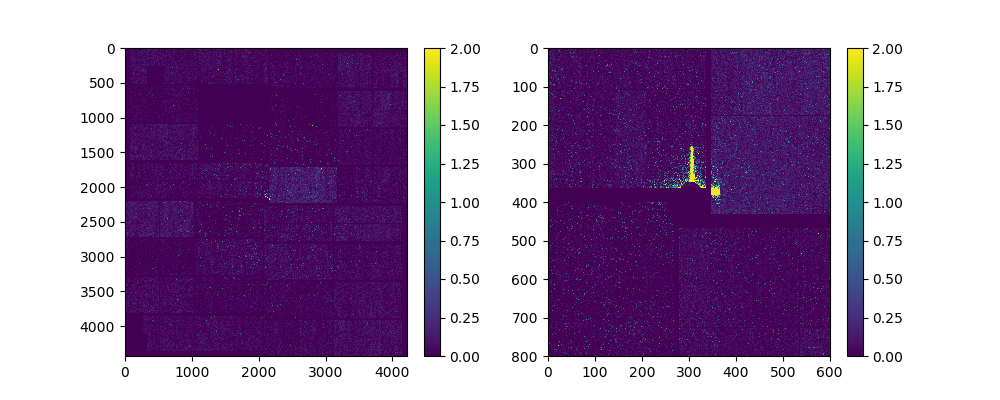

In [15]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.imshow(avg_img,aspect='auto',clim=[0,2])
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(avg_img[1800:2600,1800:2400],aspect='auto',clim=[0,2])
plt.colorbar()

plt.show()

<IPython.core.display.Javascript object>


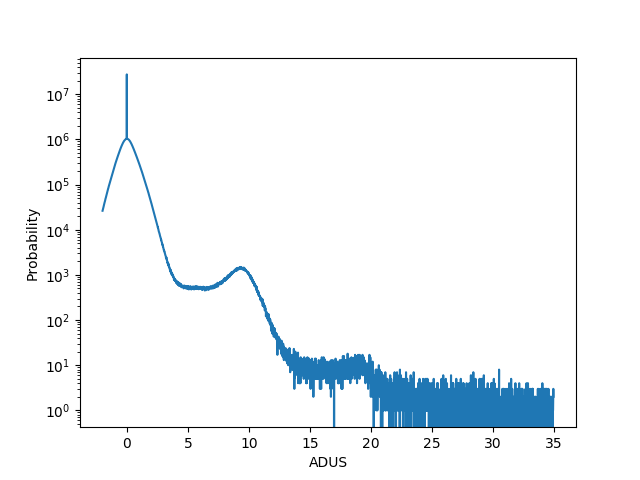

In [16]:
plt.figure()
plt.plot(hx,hy_avg)
plt.yscale('log',nonposy='clip')
plt.ylabel('Probability')
plt.xlabel('ADUS')
plt.show()